# Penguins dataset - machine learning algorithm

To go over this model, I'll use the seaborn penguins dataset.



In [18]:
import sys 
print(f'Python: {sys.version}')

import numpy as np
print(f'numpy: {np.__version__}')

import pandas as pd
print(f'pandas: {pd.__version__}')

import matplotlib 
print(f'matplotlib: {matplotlib.__version__}')

import seaborn as sns
print(f'seaborn: {sns.__version__}')

import sklearn as sk
print(f'sklearn: {sk.__version__}')

Python: 3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]
numpy: 1.23.5
pandas: 1.5.3
matplotlib: 3.7.0
seaborn: 0.12.2
sklearn: 1.2.1


In [19]:
penguins = sns.load_dataset('penguins')

## Let's explore data

In [20]:
penguins.shape

(344, 7)

It means the dataset has 344 rows and 7 columns.

In [21]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


This .info() shows us the content and the datatype of the columns.

There are 3 columns which contains categorical data:
1. species
2. island
3. sex

The other 4 columns contains numerical datas.

In [22]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Now we can see a summary statistics about the quantitative datas. 

If you give a closer look, it seems there are no big differencies between mean and mediation(50%), it indicates there are no outliers. 

# Visualization 

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 640x480 with 0 Axes>

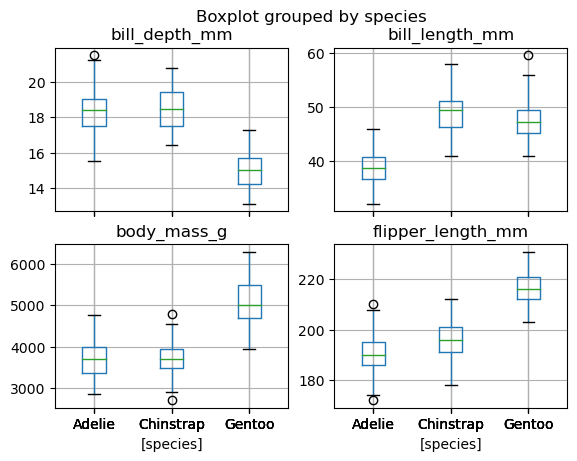

In [23]:
import matplotlib.pyplot as plt
plt.figure()
penguins.boxplot(by='species', sharey=False)
plt.show

<Axes: xlabel='species', ylabel='body_mass_g'>

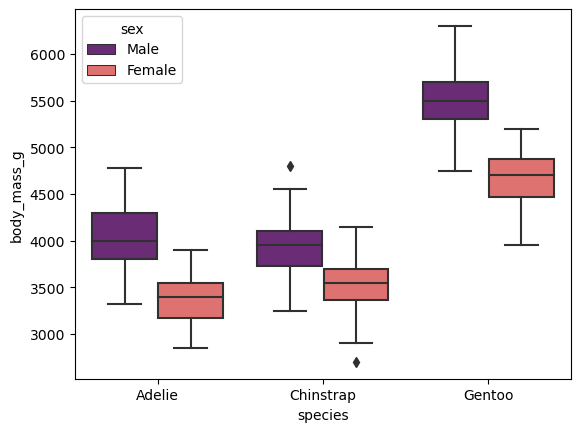

In [24]:
sns.boxplot(x='species', y='body_mass_g', data=penguins, hue='sex', palette='magma')

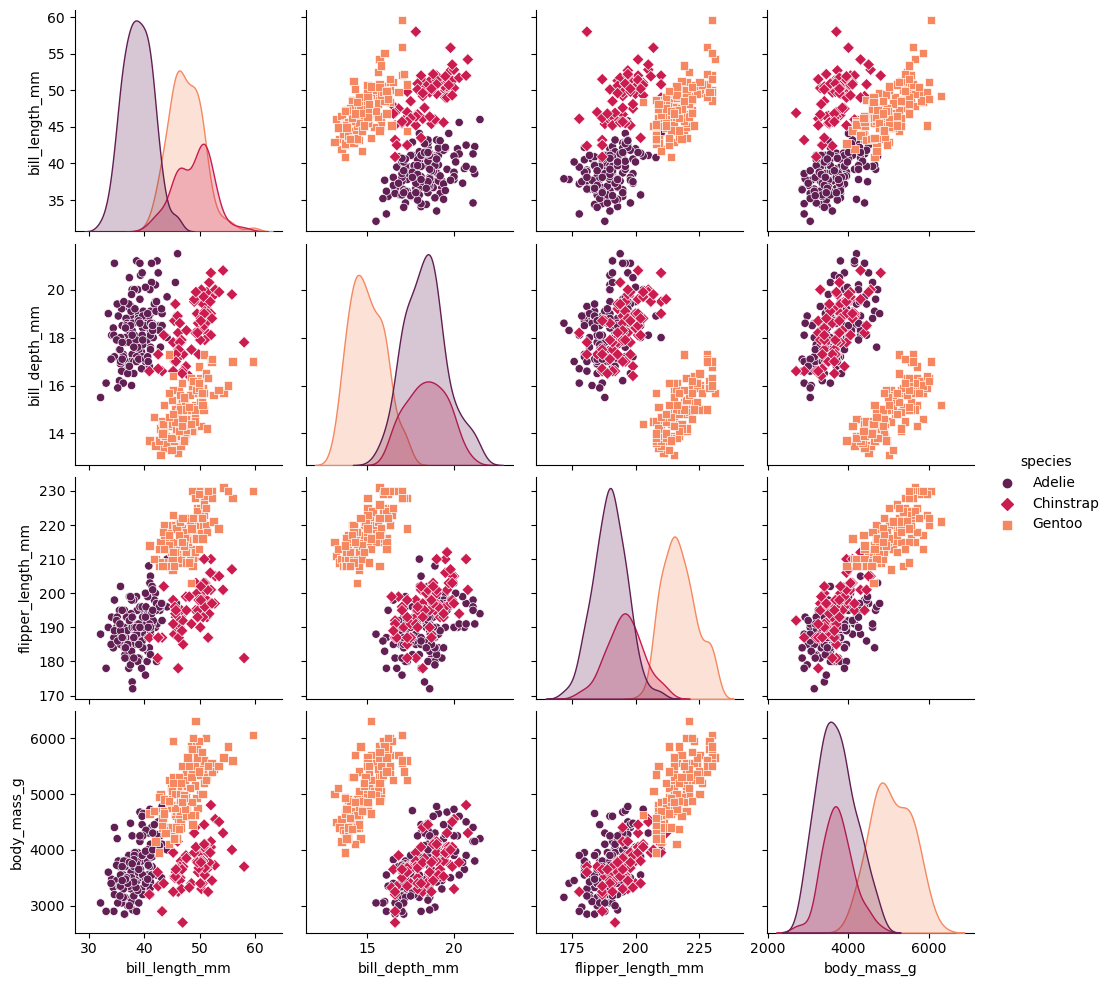

In [25]:
sns.pairplot(penguins, hue='species', palette='rocket', markers=['o', 'D', 's'])

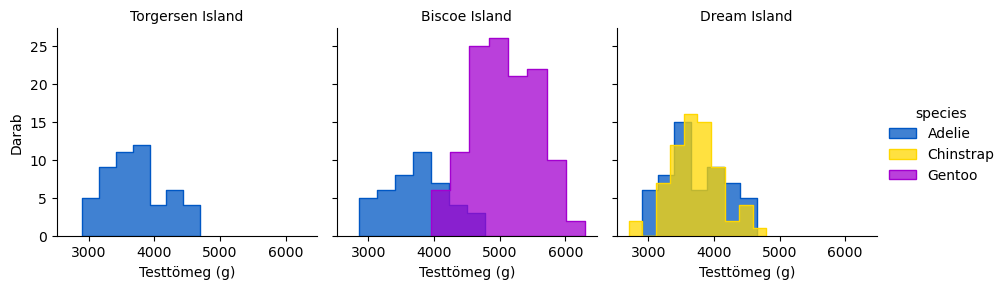

In [26]:
g = sns.FacetGrid(penguins, col='island',  hue='species', palette='prism')
g.map_dataframe(sns.histplot, x='body_mass_g',  element='step',)
g.add_legend()
g.set_axis_labels('Testtömeg (g)', 'Darab')
g.set_titles(col_template='{col_name} Island', row_template='{row_name}')

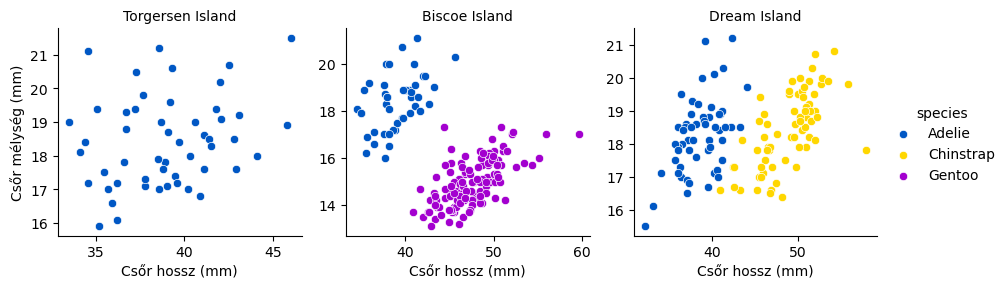

In [27]:
g = sns.FacetGrid(penguins, col='island', sharey=False, sharex=False,  hue='species', palette='prism')
g.map_dataframe(sns.scatterplot, x='bill_length_mm', y='bill_depth_mm')
g.add_legend()
g.set_axis_labels('Csőr hossz (mm)', 'Csőr mélység (mm)')
g.set_titles(col_template='{col_name} Island', row_template='{row_name}');

# Cleaning data

First, checking missing values. 
After decide to remove them or fill them.

This case a I dropped the sex column - it had several missing values, afterwards I dropped 2 rows without data.

Remained 342 rows out of 344, which is no loss.


In [28]:
penguins.drop('sex', axis=1, inplace=True)

In [30]:
penguins.shape

(344, 6)

In [31]:
penguins.dropna(inplace=True)

In [33]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
dtypes: float64(4), object(2)
memory usage: 18.7+ KB


# Executing a machine learning algorithm

In [34]:
penguins_feature = penguins.drop(['species', 'island'], axis=1)
penguins_target = penguins['species']
print('penguins_feature')
print(penguins_feature)
print('penguins_target')
print(penguins_target)

penguins_feature
     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0              39.1           18.7              181.0       3750.0
1              39.5           17.4              186.0       3800.0
2              40.3           18.0              195.0       3250.0
4              36.7           19.3              193.0       3450.0
5              39.3           20.6              190.0       3650.0
..              ...            ...                ...          ...
338            47.2           13.7              214.0       4925.0
340            46.8           14.3              215.0       4850.0
341            50.4           15.7              222.0       5750.0
342            45.2           14.8              212.0       5200.0
343            49.9           16.1              213.0       5400.0

[342 rows x 4 columns]
penguins_target
0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo

In [35]:
from sklearn.model_selection import train_test_split
penguins_feature_train, penguins_feature_test, penguins_target_train, penguins_target_test = train_test_split(penguins_feature, penguins_target, test_size=1/3, random_state=12345)
print(penguins_feature_train.shape)
print(penguins_feature_test.shape)
print(penguins_target_train.shape)
print(penguins_target_test.shape)

(228, 4)
(114, 4)
(228,)
(114,)


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

for name, model in [
    ('Logistic Regression', LogisticRegression(solver='liblinear')),
    ('Linear Discriminant Analysis', LinearDiscriminantAnalysis()),
    ('K-Neighbors Classifier', KNeighborsClassifier()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('C-Support Vector Classification', SVC()),
]:
    kfold = StratifiedKFold(n_splits=10, random_state=11111, shuffle=True)
    cv_results = cross_val_score(model, penguins_feature, penguins_target, cv=kfold, scoring='accuracy')
    print(f'{name}: {100*cv_results.mean():.2f}%')

Logistic Regression: 98.82%
Linear Discriminant Analysis: 98.53%
K-Neighbors Classifier: 80.39%
Decision Tree Classifier: 96.77%
Gaussian Naive Bayes: 97.07%
C-Support Vector Classification: 73.67%


In [45]:
from sklearn.metrics import confusion_matrix

logreg = LogisticRegression(solver='liblinear')
logreg.fit(penguins_feature_test, penguins_target_test) 

penguins_target_predicted = logreg.predict(penguins_feature_test)

# R^2
r2_score = logreg.score(penguins_feature_test, penguins_target_test)
print("R^2:", r2_score)

R^2: 1.0


In [42]:
confusion_matrix_result = confusion_matrix(penguins_target_test, penguins_target_predicted)
print(confusion_matrix_result)

[[51  0  0]
 [ 0 22  0]
 [ 0  0 41]]


In [43]:
print(pd.DataFrame(
    confusion_matrix(penguins_target_test, penguins_target_predicted),
    index=['Adelie', 'Chinstrap', 'Gentoo'],
    columns=['Adelie', 'Chinstrap', 'Gentoo']
))

           Adelie  Chinstrap  Gentoo
Adelie         51          0       0
Chinstrap       0         22       0
Gentoo          0          0      41


In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(penguins_feature_train, penguins_target_train)
penguins_target_predicted = knn.predict(penguins_feature_test)

In [47]:
for test, predicted in zip(penguins_target_test.tolist(), penguins_target_predicted.tolist()):
    print(f'{"" if test == predicted else "* "}{test} {predicted}')

Gentoo Gentoo
Chinstrap Chinstrap
Gentoo Gentoo
* Chinstrap Adelie
Adelie Adelie
Gentoo Gentoo
Chinstrap Chinstrap
Gentoo Gentoo
Adelie Adelie
* Chinstrap Adelie
Gentoo Gentoo
Adelie Adelie
Adelie Adelie
* Adelie Gentoo
Chinstrap Chinstrap
* Adelie Chinstrap
Adelie Adelie
Gentoo Gentoo
* Chinstrap Gentoo
Gentoo Gentoo
Gentoo Gentoo
Gentoo Gentoo
* Gentoo Adelie
Adelie Adelie
* Chinstrap Adelie
Adelie Adelie
Adelie Adelie
Adelie Adelie
Adelie Adelie
Adelie Adelie
* Gentoo Chinstrap
Adelie Adelie
Gentoo Gentoo
* Adelie Chinstrap
Adelie Adelie
Chinstrap Chinstrap
Chinstrap Chinstrap
Adelie Adelie
Adelie Adelie
Chinstrap Chinstrap
Adelie Adelie
Gentoo Gentoo
* Gentoo Adelie
Gentoo Gentoo
Adelie Adelie
Adelie Adelie
Adelie Adelie
Adelie Adelie
Adelie Adelie
Adelie Adelie
* Gentoo Adelie
Gentoo Gentoo
Adelie Adelie
* Adelie Chinstrap
* Chinstrap Adelie
Gentoo Gentoo
Gentoo Gentoo
Gentoo Gentoo
* Chinstrap Adelie
* Adelie Gentoo
Adelie Adelie
Adelie Adelie
Gentoo Gentoo
Gentoo Gentoo
* Gentoo

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(penguins_target_test, penguins_target_predicted)

array([[45,  3,  3],
       [10, 10,  2],
       [ 7,  1, 33]], dtype=int64)

In [49]:
print(pd.DataFrame(
    confusion_matrix(penguins_target_test, penguins_target_predicted),
    index=['Adelie', 'Chinstrap', 'Gentoo'],
    columns=['Adelie', 'Chinstrap', 'Gentoo']
))

           Adelie  Chinstrap  Gentoo
Adelie         45          3       3
Chinstrap      10         10       2
Gentoo          7          1      33


In [50]:
from sklearn import metrics
print(f'{100*metrics.accuracy_score(penguins_target_test, penguins_target_predicted):.1f}%')

77.2%


In [51]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
kfold = StratifiedKFold(n_splits=10, random_state=54321, shuffle=True)
cross_val_score(knn, penguins_feature, penguins_target, cv=kfold, scoring='accuracy')

array([0.68571429, 0.8       , 0.82352941, 0.73529412, 0.85294118,
       0.76470588, 0.91176471, 0.85294118, 0.73529412, 0.79411765])

In [59]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(penguins_feature_train, penguins_target_train)

penguins_target_predicted = dt_classifier.predict(penguins_feature_train)


In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score

accuracy = accuracy_score(penguins_target_train, penguins_target_predicted)
print("Accuracy:", accuracy)

confusion_matrix(penguins_target_train, penguins_target_predicted)

Accuracy: 1.0


array([[100,   0,   0],
       [  0,  44,   0],
       [  0,   0,  78]], dtype=int64)